### `datetime` and plotting with `matplotlib` and `seaborn`

Today we continue to work with `matplotlib`, focusing on customization and using subplots.  Also, the `seaborn` library will be introduced as a second visualization library with additional functionality for plotting data.

In [ ]:
#!pip install -U seaborn

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### `datetime`

A special type of data for pandas are entities that can be considered as dates.  We can create a special datatype for these using `pd.to_datetime`, and access the functions of the `datetime` module as a result.

In [3]:
# read in the AAPL data
appl = pd.read_csv('data/AAPL.csv')
appl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-04-25,5.212857,5.288571,5.158571,5.282857,3.522625,186615100
1,2005-04-26,5.254286,5.358572,5.160000,5.170000,3.447372,202626900
2,2005-04-27,5.127143,5.194286,5.072857,5.135714,3.424510,153472200
3,2005-04-28,5.184286,5.191429,5.034286,5.077143,3.385454,143776500
4,2005-04-29,5.164286,5.175714,5.031428,5.151429,3.434988,167907600


In [7]:
# convert to datetime
appl['Date'] = pd.to_datetime(appl['Date'])

In [8]:
# extract the month
appl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3523 entries, 0 to 3522
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3523 non-null   datetime64[ns]
 1   Open       3523 non-null   float64       
 2   High       3523 non-null   float64       
 3   Low        3523 non-null   float64       
 4   Close      3523 non-null   float64       
 5   Adj Close  3523 non-null   float64       
 6   Volume     3523 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 192.8 KB


In [11]:
# extract the day
appl['Day'] = appl['Date'].dt.day

In [16]:
# set date to be index of data
#appl.set_index('Date', inplace = True)

In [18]:
# sort the index
appl.sort_index(inplace = True)

In [23]:
# select 2019
appl.loc['2019']

,Open,High,Low,Close,Adj Close,Volume,Day
Date,,,,,,,
2019-01-02,154.889999,158.850006,154.229996,157.919998,157.245605,37039700,2
2019-01-03,143.979996,145.720001,142.000000,142.190002,141.582779,91244100,3
2019-01-04,144.529999,148.550003,143.800003,148.259995,147.626846,58607100,4
2019-01-07,148.699997,148.830002,145.899994,147.929993,147.298264,54777800,7
2019-01-08,149.559998,151.820007,148.520004,150.750000,150.106216,41025300,8
...,...,...,...,...,...,...,...
2019-04-16,199.460007,201.369995,198.559998,199.250000,199.250000,25696400,16
2019-04-17,199.539993,203.380005,198.610001,203.130005,203.130005,28906800,17
2019-04-18,203.119995,204.149994,202.520004,203.860001,203.860001,24195800,18


In [26]:
# read back in using parse_dates = True and index_col = 0
pd.read_csv('data/AAPL.csv', parse_dates = True, index_col = 0).info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3523 entries, 2005-04-25 to 2019-04-23
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       3523 non-null   float64
 1   High       3523 non-null   float64
 2   Low        3523 non-null   float64
 3   Close      3523 non-null   float64
 4   Adj Close  3523 non-null   float64
 5   Volume     3523 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 192.7 KB


In [27]:
from datetime import datetime

In [29]:
# what time is it?
now = datetime.now()

In [31]:
# how much time has passed?
datetime.now() - now

datetime.timedelta(seconds=32, microseconds=725024)

#### More with timestamps

- Date times: A specific date and time with timezone support. Similar to datetime.datetime from the standard library.

- Time deltas: An absolute time duration. Similar to datetime.timedelta from the standard library.


In [ ]:
# most recent date?


In [ ]:
# earliest?


In [ ]:
# time range?


In [32]:
# create a pd.Timedelta
pd.Timedelta(5, 'D')

Timedelta('5 days 00:00:00')

In [35]:
# shift a date by 3 months
now + pd.Timedelta(90, 'D')

datetime.datetime(2022, 12, 26, 9, 57, 33, 736364)

##### Problems

1. Return to the ufo data and convert the Time column to a datetime object.

In [37]:
ufo = pd.read_csv('data/ufo.csv')
ufo['Time'] = pd.to_datetime(ufo['Time'])
ufo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80543 entries, 0 to 80542
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   City             80496 non-null  object        
 1   Colors Reported  17034 non-null  object        
 2   Shape Reported   72141 non-null  object        
 3   State            80543 non-null  object        
 4   Time             80543 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(4)
memory usage: 3.1+ MB


2. Set the Time column as the index column of the data.

In [38]:
ufo.set_index('Time', inplace = True)
ufo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 80543 entries, 1930-06-01 22:00:00 to 2014-09-05 05:30:00
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   City             80496 non-null  object
 1   Colors Reported  17034 non-null  object
 2   Shape Reported   72141 non-null  object
 3   State            80543 non-null  object
dtypes: object(4)
memory usage: 3.1+ MB


3. Sort it

In [39]:
ufo.sort_index(inplace = True)
ufo.head()

,City,Colors Reported,Shape Reported,State
Time,,,,
1930-06-01 22:00:00,Ithaca,NaN,TRIANGLE,NY
1930-06-30 20:00:00,Willingboro,NaN,OTHER,NJ
1931-02-15 14:00:00,Holyoke,NaN,OVAL,CO
1931-06-01 13:00:00,Abilene,NaN,DISK,KS
1933-04-18 19:00:00,New York Worlds Fair,NaN,LIGHT,NY


4. Create a new dataframe with ufo sightings since January 1, 1999

In [41]:
ufo.loc['1999-01-01':]

,City,Colors Reported,Shape Reported,State
Time,,,,
1999-01-01 02:30:00,Loma Rica,NaN,LIGHT,CA
1999-01-01 03:00:00,Bauxite,NaN,NaN,AR
1999-01-01 14:00:00,Florence,NaN,CYLINDER,SC
1999-01-01 15:00:00,Lake Henshaw,NaN,CIGAR,CA
1999-01-01 17:15:00,Wilmington Island,NaN,LIGHT,GA
...,...,...,...,...
2014-09-04 23:20:00,Neligh,NaN,CIRCLE,NE
2014-09-05 01:14:00,Uhrichsville,NaN,LIGHT,OH
2014-09-05 02:40:00,Tucson,RED BLUE,NaN,AZ


#### Subplots and Axes

![](https://matplotlib.org/stable/_images/sphx_glr_anatomy_001_2_0x.png)

array([<AxesSubplot: >, <AxesSubplot: >], dtype=object)

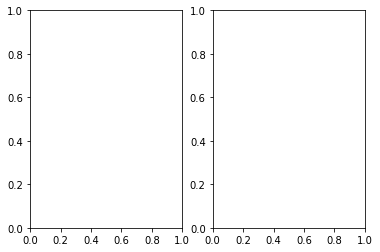

In [44]:
### create a 1 row 2 column plot
fig, ax = plt.subplots(nrows = 1, ncols = 2)
ax

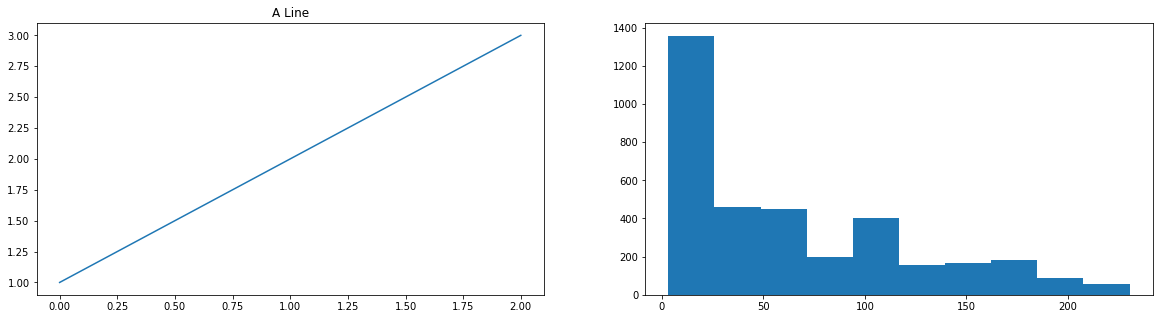

In [51]:
### add a plot to each axis
fig, ax = plt.subplots(1, 2, figsize = (20, 5))
ax[0].plot([1, 2, 3])
ax[1].hist(appl['Adj Close']);
ax[0].set_title('A Line');

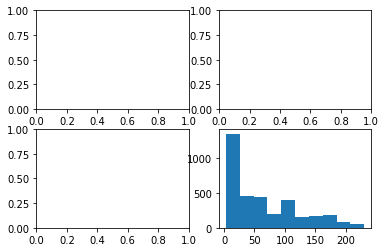

In [54]:
### create a 2 x 2 grid of plots
### add histogram to bottom right plot
fig, ax = plt.subplots(nrows=2, ncols = 2)
ax[1, 1].hist(appl['Adj Close']);

In [55]:
### titles and labels
ax[1, 1].set_title('Histogram of Adjusted Close')

Text(0.5, 1.0, 'Histogram of Adjusted Close')

#### Introduction to `seaborn`

The `seaborn` library is built on top of `matplotlib` and offers high level visualization tools for plotting data.

In [56]:
### load a sample dataset on tips
tips = sns.load_dataset('tips')

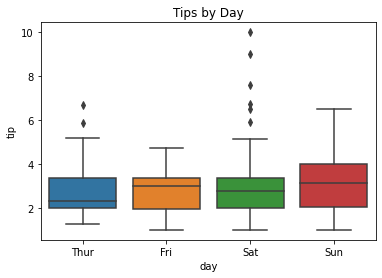

In [59]:
### boxplot of tips by day
sns.boxplot(data = tips, x = 'day', y = 'tip')
plt.title('Tips by Day');

<AxesSubplot: xlabel='day', ylabel='tip'>

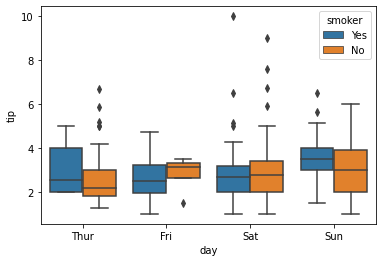

In [60]:
### boxplot of tips by day by smoker
sns.boxplot(data = tips, x = 'day', y = 'tip', hue = 'smoker')

#### `displot`

For visualizing distributions of data.

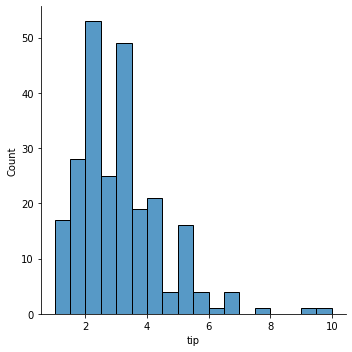

In [61]:
### histogram of tips
sns.displot(data = tips, x = 'tip')

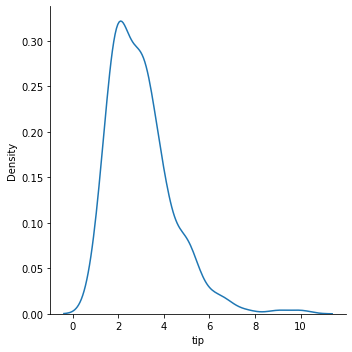

In [62]:
### kde plot
sns.displot(data = tips, x = 'tip', kind = 'kde')

In [ ]:
### both


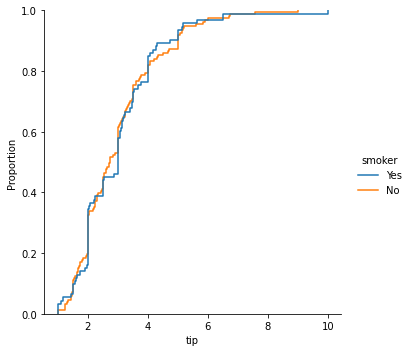

In [63]:
### empirical cumulative distribution plot of tips by smoker
sns.displot(data = tips, x = 'tip', kind = 'ecdf', hue = 'smoker')

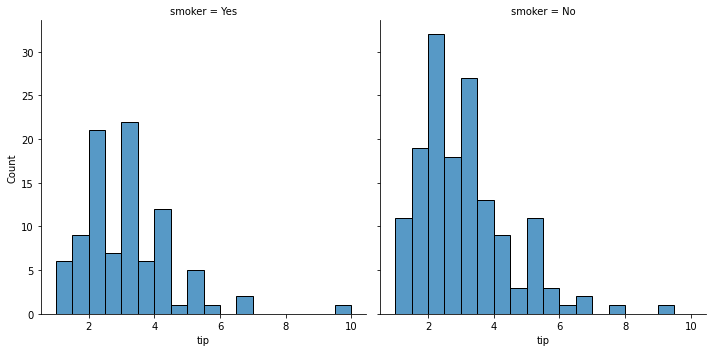

In [64]:
### using the col argument
sns.displot(data = tips, x = 'tip', col = 'smoker')

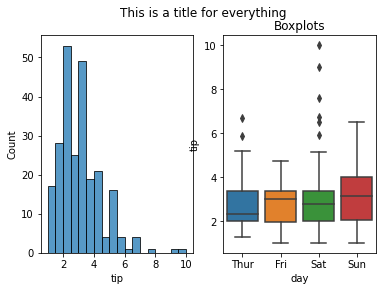

In [69]:
#draw a histogram and a boxplot using seaborn on two axes
fig, ax = plt.subplots(1, 2)
sns.histplot(data = tips, x = 'tip', ax = ax[0])
sns.boxplot(data = tips, x = 'day', y = 'tip', ax = ax[1])
ax[1].set_title('Boxplots')
fig.suptitle('This is a title for everything');

#### `relplot`

For visualizing relationships.

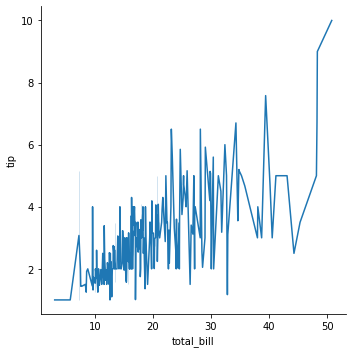

In [71]:
### relplot of bill vs. tip
sns.relplot(data = tips, x = 'total_bill', y = 'tip', kind = 'line')

In [ ]:
### regression plot


#### `catplot`

Plots of categorical data.

In [ ]:
### catplot of tips


In [ ]:
### swarm


In [ ]:
### violin plot


In [ ]:
### countplot


1. Create a histogram with kde plot of flipper length by species.  

In [ ]:
penguins = sns.load_dataset('penguins')

2. Create a scatterplot of bill length vs. flipper length.

3. Create a violin plot of each species mass split by sex.

#### Additional Plots

- `pairplot`
- `heatmap`

In [ ]:
### pairplot of penguins colored by species


In [ ]:
### housing data


In [ ]:
### correlation in data


In [ ]:
### heatmap of correlations


#### Review



In [ ]:
data = {'Food': ['French Fries', 'Potato Chips', 'Bacon', 'Pizza', 'Chili Dog'],
        'Calories per 100g':  [607, 542, 533, 296, 260]}
cals = pd.DataFrame(data)

**EXERCISE**

- Set 'Food' as the index of cals.
- Create a bar chart with calories.
- Add a title.
- Change the color of the bars.  
- Add the argument alpha=0.5.  What does it do?
- Change your chart to a horizontal bar chart.  Which do you prefer?